In [1]:
!nvidia-smi


Thu Feb 15 10:26:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.9 MB/s eta 0:00:00


In [4]:

import numpy as np
import shutil
import random
import tensorflow as tf
from tensorflow_addons.metrics import F1Score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [5]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="Yp3RK5raZJ7EW8cRulik")
project = rf.workspace("joseph-nelson").project("covid-19-and-pneumonia-scans")
dataset = project.version(1).download("folder")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycl

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to COVID-19-and-Pneumonia-Scans-1 in folder:: 100%|██████████| 5889/5889 [00:00<00:00, 7231.23it/s]


In [6]:
rf = Roboflow(api_key="Yp3RK5raZJ7EW8cRulik")
project = rf.workspace("umar-farooq").project("classification-kdgyu")
dataset = project.version(1).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to classification-1 in folder:: 100%|██████████| 12781/12781 [00:03<00:00, 3521.08it/s]


In [7]:
# Define your source and destination directories
source_directories = [
    "/content/COVID-19-and-Pneumonia-Scans-1/train/covid-19",
    "/content/classification-1/train/COVID-19"
]

destination_directory = "/content/combined_covid-19"

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Loop through source directories and copy their contents to the destination directory
for source_dir in source_directories:
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_directory, filename)
        shutil.copy(source_path, destination_path)

# Optionally, you can print the number of files copied
file_count = len(os.listdir(destination_directory))
print(f"Combined {file_count} files into {destination_directory}")


Combined 4761 files into /content/combined_covid-19


In [8]:
# Define your source directories
source_directories = [
    "/content/COVID-19-and-Pneumonia-Scans-1/train/healthy",
    "/content/classification-1/train/Normal",
]

destination_directory = "/content/combined_data_normal"

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Loop through source directories and copy their contents to the destination directory
for source_dir in source_directories:
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_directory, filename)
        shutil.copy(source_path, destination_path)

# Optionally, you can print the number of files copied
file_count = len(os.listdir(destination_directory))
print(f"Combined {file_count} files into {destination_directory}")


Combined 5817 files into /content/combined_data_normal


In [9]:
# Define your source directories
source_directories = [
    "/content/COVID-19-and-Pneumonia-Scans-1/train/pneumonia",
]

destination_directory = "/content/combined_data_pneumonia"

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Loop through source directories and copy their contents to the destination directory
for source_dir in source_directories:
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_directory, filename)
        shutil.copy(source_path, destination_path)

# Optionally, you can print the number of files copied
file_count = len(os.listdir(destination_directory))
print(f"Combined {file_count} files into {destination_directory}")


Combined 3723 files into /content/combined_data_pneumonia


In [10]:
# Directory paths
combined_covid19_directory = "/content/combined_covid-19"
combined_data_normal_directory = "/content/combined_data_normal"
combined_data_pneumonia_directory = "/content/combined_data_pneumonia"
destination_directory = "/content/data"

# Create the main "data" directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Function to copy a random set of files from a source directory to the destination
def copy_random_files(source_directory, destination_subdirectory, num_files):
    subdirectory_path = os.path.join(destination_directory, destination_subdirectory)
    if not os.path.exists(subdirectory_path):
        os.makedirs(subdirectory_path)

    filenames = os.listdir(source_directory)
    random_files = random.sample(filenames, num_files)
    for filename in random_files:
        source_path = os.path.join(source_directory, filename)
        destination_path = os.path.join(subdirectory_path, filename)
        shutil.copy(source_path, destination_path)

# Copy 5,000 random files from each combined directory to their respective subfolders within the "data" directory
copy_random_files(combined_covid19_directory, "covid19", 3000)
copy_random_files(combined_data_normal_directory, "normal", 3000)
copy_random_files(combined_data_pneumonia_directory, "pneumonia", 3000)

# Optionally, you can print a message indicating the operation was successful
print("Successfully copied 3,000 random files into subfolders in the 'data' directory.")


Successfully copied 3,000 random files into subfolders in the 'data' directory.


In [11]:
pip install split-folders

In [12]:
import splitfolders

splitfolders = splitfolders.ratio('/content/data', output="/content/data_split", seed=42, ratio=(.7, .2, .1),group_prefix=None) # default values

Copying files: 9000 files [00:01, 4607.93 files/s]


In [13]:
!pip install tensorflow


In [14]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
from tensorflow.keras.models import load_model


vgg = load_model('/content/drive/MyDrive/Final/Models/Lung_VGG16/best_model.h5')

yolo = load_model(r'/content/drive/MyDrive/yolo.h5')

In [ ]:
import os

labels = ['covid19','normal','pneumonia']



for label in labels:

  directory_path = f"/content/data_split/test/{label}"

  for filename in os.listdir(directory_path):
      file_path = os.path.join(directory_path, filename)

      if os.path.isfile(file_path):
          parts = filename.split('.', 1)

          os.rename(file_path, os.path.join(directory_path, parts[1]))
          print(f"File '{filename}' renamed to '{parts[1]}'.")



In [ ]:
labels = ['covid19','normal','pneumonia']



for label in labels:

  directory_path = f"/content/data_split/test/{label}"

  for filename in os.listdir(directory_path):
      file_path = os.path.join(directory_path, filename)

      if os.path.isfile(file_path):
          parts = filename.split('.', 1)

          os.rename(file_path, os.path.join(directory_path, parts[1]))
          print(f"File '{filename}' renamed to '{parts[1]}'.")


In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
class_labels = {
    0: 'covid19',
    1: 'normal',
    2: 'pneumonia'
}

class_names = ['covid19', 'normal', 'pneumonia']

test_dirs = [
    "/content/data_split/test/covid19",
    "/content/data_split/test/normal",
    "/content/data_split/test/pneumonia"
]

true_labels = []
predicted_labels = []

for class_idx, test_dir in enumerate(test_dirs):
    class_label = class_labels[class_idx]

    image_files = [os.path.join(test_dir, file) for file in os.listdir(test_dir) if file.endswith(".jpg")]

    for image_path in image_files:
        image = load_img(image_path, target_size=(224, 224))
        image_array = img_to_array(image)
        rescaled_image = image_array / 255.0
        rescaled_image = rescaled_image.reshape((1,) + rescaled_image.shape)
        result_vgg = vgg.predict(rescaled_image)
        result_yolo = yolo.predict(rescaled_image)
        ensemble_pred = (result_vgg + result_yolo) / 2
        predicted_class_index = np.argmax(ensemble_pred)
        ensemble_class = class_names[predicted_class_index]
        predicted_labels.append(predicted_class_index)
        true_labels.append(class_idx)

Accuracy: 0.9055555555555556


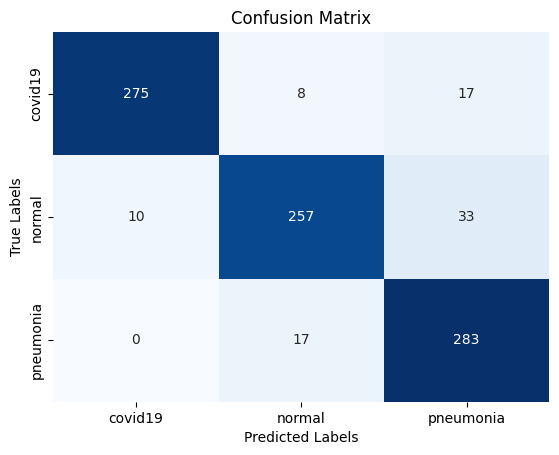

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(true_labels, predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)

class_names = ['covid19', 'normal', 'pneumonia']

print("Accuracy:", accuracy)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
